# Mollie's coding challenge

Dear candidate, with this notebook we hope to present to you a challenging but above all a fun coding exercise.

The goal is to train a simple model, store the state of the trained model and use that model in an API end-point that you have to build. You can use any library you want.


## Data to use:

Use the Wisconsin breast cancer dataset as shown below:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
# df = pd.read_csv(
#     "https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
# ).drop(columns=["Unnamed: 32", "id"])
df = pd.read_csv("cancer.csv").drop(columns=["Unnamed: 32", "id"])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## You're up now!

Use this dataset to perform your analysis and data cleaning and ultimately, to create an API that could be used to serve as a prediction endpoint using your trained model.

In [3]:
y_column_name = "diagnosis"
y = df[y_column_name]
X = df.drop(columns=[y_column_name])

In [4]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
y.shape

(569,)

In [6]:
y.value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [7]:
px.histogram(df, x="diagnosis", color="diagnosis")

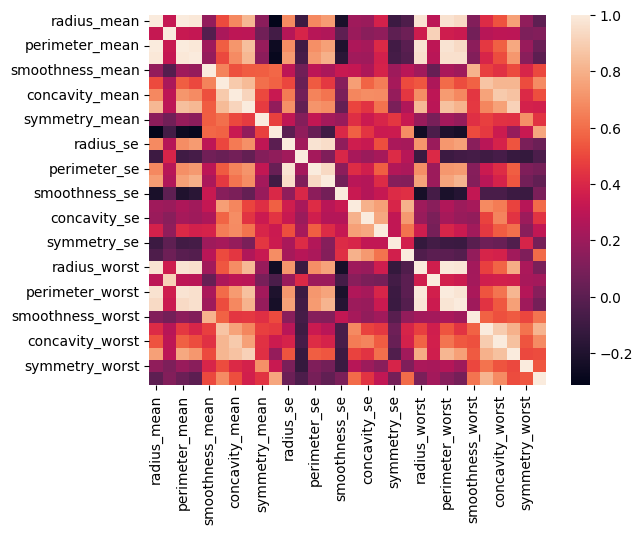

In [8]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix)
plt.show()

## Model

In [9]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_auc_score,
    f1_score
)
from sklearn.model_selection import (
    train_test_split,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
def plot_precision_recall(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    ax.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    ax.set_title("Precision and Recall \n Tradeoff", fontsize=18)
    ax.set_ylabel("Level of Precision and Recall", fontsize=16)
    ax.set_xlabel("Thresholds", fontsize=16)
    ax.legend(loc="best", fontsize=14)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    return ax

In [11]:
y = df["diagnosis"].map({"B": 0, "M": 1})

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.3, stratify=y
)

In [13]:
class_distribution_train = y_train.value_counts(normalize=True)
class_distribution_test = y_test.value_counts(normalize=True)
class_weight_ratio = class_distribution_train[0] / class_distribution_train[1]

In [14]:
type(class_weight_ratio)

numpy.float64

In [15]:
class_weight_ratio

1.6891891891891893

In [16]:
def metrics(y, y_pred, y_prob):
    print(f"roc_auc_score: {roc_auc_score(y, y_prob)}")
    print(f"f1_score: {f1_score(y, y_pred, average='weighted')}")
    

In [17]:
rf_model = RandomForestClassifier(
    class_weight={0: 1, 1: class_weight_ratio}, random_state=42
)
rf_model.fit(X_train, y_train)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict(X_test)
metrics(y_test, y_pred_rf, y_prob_rf)

roc_auc_score: 0.9964953271028038
f1_score: 0.9764455036179777


In [19]:
features_to_transform = X.columns
transformer = Pipeline(steps=[("standard_scaler", StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ("std", transformer, features_to_transform),
    ]
)

logistic_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "model",
            LogisticRegression(
                class_weight={0: 1, 1: class_weight_ratio},
                max_iter=1000,
                solver="liblinear",
                random_state=42,
            ),
        ),
    ]
)

logistic_model.fit(X_train, y_train)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_logistic = logistic_model.predict(X_test)
metrics(y_test, y_pred_logistic, y_prob_logistic)

roc_auc_score: 0.9960572429906542
f1_score: 0.9765308332559794


In [20]:
# Calculating precision and recall for the custom threshold of 0.2 for both models
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_prob_rf)
precision_logistic, recall_logistic, thresholds_logistic = precision_recall_curve(
    y_test, y_prob_logistic
)

<Axes: title={'center': 'Precision and Recall \n Tradeoff'}, xlabel='Thresholds', ylabel='Level of Precision and Recall'>

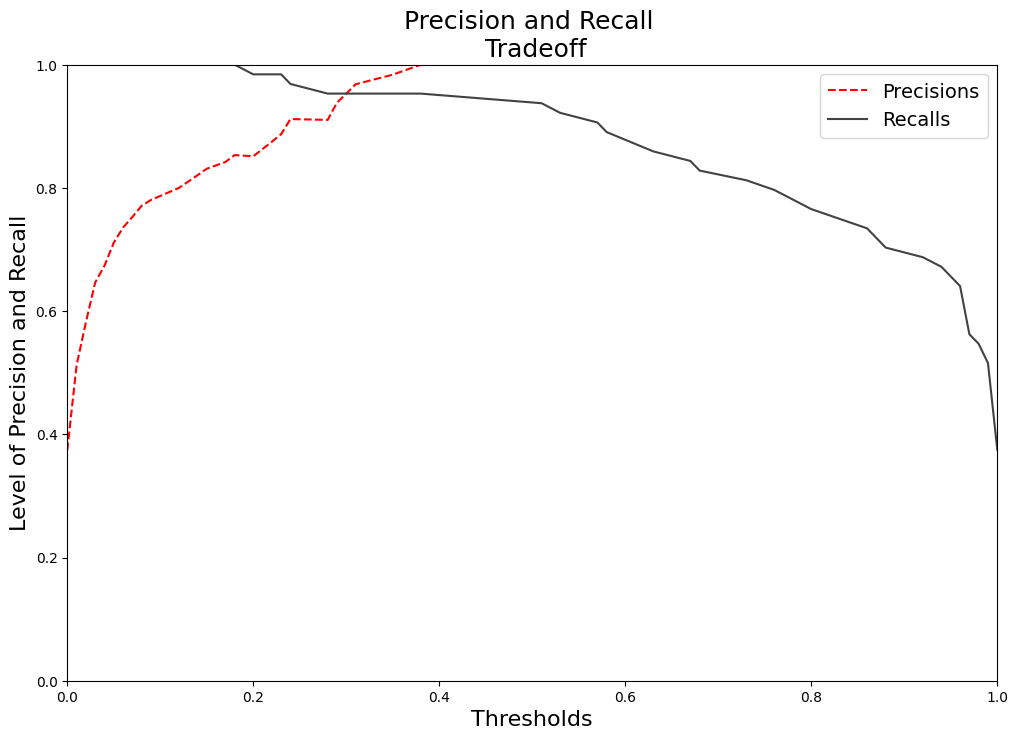

In [21]:
plot_precision_recall(precision_rf, recall_rf, thresholds_rf)

In the context of breast cancer diagnosis (assuming that's the problem being addressed in the given dataset), false positives and false negatives have specific and significant meanings:

**False Positives (FP)**: A false positive occurs when the model incorrectly predicts that a benign (non-cancerous) sample is malignant (cancerous). While this can lead to unnecessary further testing and anxiety for the patient, it is generally considered less harmful than a false negative, as it errs on the side of caution.

**False Negatives (FN)**: A false negative occurs when the model incorrectly predicts that a malignant (cancerous) sample is benign (non-cancerous). This is a more serious error, as it means that cancer may go undetected and untreated, potentially leading to a delay in treatment and a worse outcome for the patient.

The trade-off between false positives and false negatives can be controlled by adjusting the threshold for classification. A lower threshold will increase sensitivity (recall) and reduce false negatives but may increase false positives. Conversely, a higher threshold will increase precision and reduce false positives but may increase false negatives.

In [22]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred, normalize="true") * 100
    df = pd.DataFrame(cm.T, index=["B", "M"], columns=["B", "M"])
    ax = sns.heatmap(df, annot=True, cmap=sns.color_palette("Blues"))
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    return ax

/Users/gabriel.soares/Desktop/Projects/Personal/MollieChallenge/.venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/Users/gabriel.soares/Desktop/Projects/Personal/MollieChallenge/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 8 ) missing from current font.



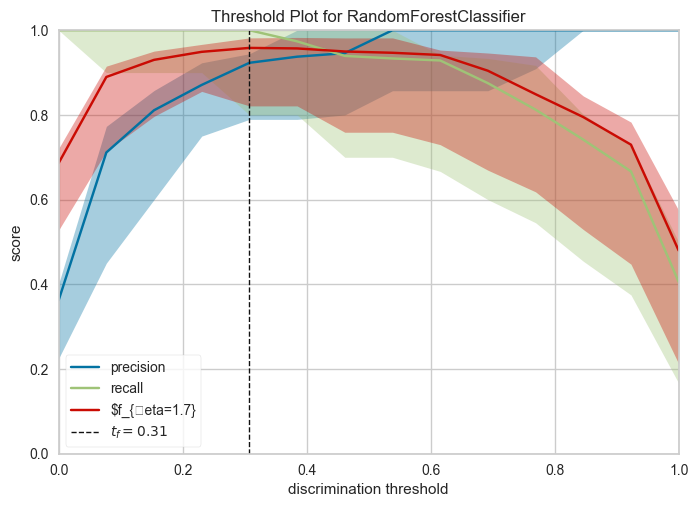

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [37]:

from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(
    rf_model,
    quantiles=np.array([0.0, 0.5, 0.75]),
    argmax="fscore",
    exclude="queue_rate",
    fbeta=class_weight_ratio
)

visualizer.fit(X_train, y_train)
visualizer.show()

In [40]:
best_threshold = visualizer.thresholds_[visualizer.cv_scores_[visualizer.argmax].argmax()]
best_threshold

0.3076923076923077

<Axes: xlabel='Predicted label', ylabel='True label'>

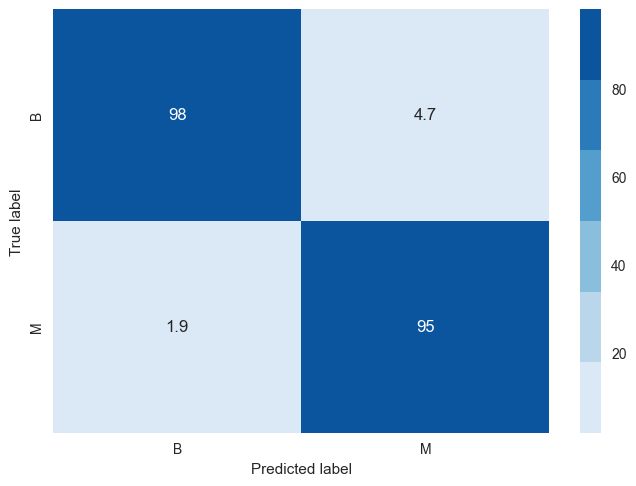

In [41]:
threshold = best_threshold
y_pred = y_prob_rf > threshold
plot_confusion_matrix(y_test, y_pred)

In [34]:
class_weight_ratio

1.6891891891891893